# Research Collaborations Between Scholars Based in Canada and Asia

In this notebook we will query the OpenAlex API to investigate **Research Collaborations Between Scholars Based in Canada and Asia**

Let's start by dividing the process into smaller, more manageable steps:

1. First we need to get all publications that:
    - have more than one authors
    - at least one of the authors is from Canada
    - at least one of the authors is from Asia countries
2. Then we validate and clean the data for further investigation.
3. Finally we can visualize our findings to answer certain questions

***

## 1. Identify collaborated publications from Canada and Asia countries.

1. First We should identify the `joint publications by Canadian/Asian authors`. From the [entity objects description](https://docs.openalex.org/about-the-data), we can defined these collaborations by [Authorship](https://docs.openalex.org/about-the-data/work#authorships) Objects:
- at least one of the authors' institutions' is located in **Canada**
- at least one of the authors' institutions' is located in **Asia**

2. Then we build the URL to get the data we want
- The entity type that we want is `work`
- The filters we want to use are:
    1. Institutions: `country_code: "CA"` + `country_code: "(Asian country)"`

<br><br><br>

<br><br><br>

## 2. Data Selection

### 2.1. Get Asian Countries Code.

We use the [ISO two-letter country code](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) to represent the countries. We should first get a list of all Asia countries' `country_code`:

In [4]:
asia_country_code = []

These unstructured text below are copied from the [website](https://www.countrycallingcodes.com/iso-country-codes/asia-codes.php). We should first extract the `2 Letter Country Code`.

In [5]:
asia_codes = '''
Afghanistan	AF	AFG	.af
Armenia	AM	ARM	.am
Azerbaijan	AZ	AZE	.az
Bahrain	BH	BHR	.bh
Bangladesh	BD	BGD	.bd
Bhutan	BT	BTN	.bt
Brunei	BN	BRN	.bn
Cambodia	KH	KHM	.kh
China	CN	CHN	.cn
Christmas Island	CX	CXR	.cx
Cocos Islands	CC	CCK	.cc
Diego Garcia	IO	IOT	.io
Georgia	GE	GEO	.ge
Hong Kong	HK	HKG	.hk
India	IN	IND	.in
Indonesia	ID	IDN	.id
Iran	IR	IRN	.ir
Iraq	IQ	IRQ	.iq
Israel	IL	ISR	.il
Japan	JP	JPN	.jp
Jordan	JO	JOR	.jo
Kazakhstan	KZ	KAZ	.kz
Kuwait	KW	KWT	.kw
Kyrgyzstan	KG	KGZ	.kg
Laos	LA	LAO	.la
Lebanon	LB	LBN	.lb
Macau	MO	MAC	.mo
Malaysia	MY	MYS	.my
Maldives	MV	MDV	.mv
Mongolia	MN	MNG	.mn
Myanmar	MM	MMR	.mm
Nepal	NP	NPL	.np
North Korea	KP	PRK	.kp
Oman	OM	OMN	.om
Pakistan	PK	PAK	.pk
Palestine	PS	PSE	.ps
Philippines	PH	PHL	.ph
Qatar	QA	QAT	.qa
Saudi Arabia	SA	SAU	.sa
Singapore	SG	SGP	.sg
South Korea	KR	KOR	.kr
Sri Lanka	LK	LKA	.lk
Syria	SY	SYR	.sy
Taiwan	TW	TWN	.tw
Tajikistan	TJ	TJK	.tj
Thailand	TH	THA	.th
Turkey	TR	TUR	.tr
Turkmenistan	TM	TKM	.tm
United Arab Emirates	AE	ARE	.ae
Uzbekistan	UZ	UZB	.uz
Vietnam	VN	VNM	.vn
Yemen	YE	YEM	.ye
'''


for i, code in enumerate(asia_codes.split('\t')):
    if i%3 == 1:
        asia_country_code.append(code)

In [6]:
print(f'There are {len(asia_country_code)} countries in Asia.')

There are 52 countries in Asia.


**🔻 Chalenge 1: We can only combine up to 50 values for a given filter with the "OR" operator: pipe symbol (|)**

🟩 Because of the limitation, we should divide these 52 countries into 50 and 2, and connect them with the pipe symbol (|), separately.

In [7]:
asia_country_code_50 = '|'.join(asia_country_code[:50])
asia_country_code_50

'AF|AM|AZ|BH|BD|BT|BN|KH|CN|CX|CC|IO|GE|HK|IN|ID|IR|IQ|IL|JP|JO|KZ|KW|KG|LA|LB|MO|MY|MV|MN|MM|NP|KP|OM|PK|PS|PH|QA|SA|SG|KR|LK|SY|TW|TJ|TH|TR|TM|AE|UZ'

In [8]:
asia_country_code_2 = '|'.join(asia_country_code[-2:])
asia_country_code_2

'VN|YE'

<br><br><br>

### 2.2. Build the URL for Request

#### 2.2.1. The URL for The First 50 Asian Countries

Now we need to put the URL together from these parts as follows:
- Starting with the base URL `https://api.openalex.org/`, we add the entity type to it : `https://api.openalex.org/works`

- All criteria need to go into the query parameter filter that is added after a question mark: `https://api.openalex.org/works?filter=`

- Finally we take the criteria we specified before and concatenate them using commas as separators. This will be our filter value: `https://api.openalex.org/works?filter=country_code:CA,authorships.institutions.country_code:{Asian_Country_Code_Connected_with_Pipe}`


- Add the `mailto=you@example.com` parameter in your API request, [as suggested by the website](https://docs.openalex.org/api#the-polite-pool): `https://api.openalex.org/works?filter=country_code:CA,authorships.institutions.country_code:{Asian_Country_Code_Connected_with_Pipe}mailto=jiangqichao564@gmail.com`

In [9]:
CA_filter = 'authorships.institutions.country_code:CA'

Asia_filter_50 = f'authorships.institutions.country_code:' + asia_country_code_50

mailto = 'mailto=jiangqichao564@gmail.com'
# By default there are 25 results per page; 
# Here we use the per-page parameter to change that to 200(the max)
paging = 'per-page=200'
cursor = 'cursor=*'

# put the URL together
filtered_works_url_50 = f'https://api.openalex.org/works?filter={",".join((CA_filter, Asia_filter_50))}'
works_cursor_url_50 = f'{filtered_works_url_50}&{paging}&{cursor}'
print(f'complete URL:\n  {works_cursor_url_50}')

complete URL:
  https://api.openalex.org/works?filter=authorships.institutions.country_code:CA,authorships.institutions.country_code:AF|AM|AZ|BH|BD|BT|BN|KH|CN|CX|CC|IO|GE|HK|IN|ID|IR|IQ|IL|JP|JO|KZ|KW|KG|LA|LB|MO|MY|MV|MN|MM|NP|KP|OM|PK|PS|PH|QA|SA|SG|KR|LK|SY|TW|TJ|TH|TR|TM|AE|UZ&per-page=200&cursor=*


#### 2.2.2. The URL for Last 2 Asian Countries

In [10]:
Asia_filter_2 = 'authorships.institutions.country_code:' + asia_country_code_2
# exclude the intersection of works with 50 Asian countries
Asia_filter_50_neg = 'authorships.institutions.country_code:!' + asia_country_code_50
cursor = 'cursor=*'
# put the URL together
filtered_works_url_2 = f'https://api.openalex.org/works?filter={",".join((CA_filter, Asia_filter_2, Asia_filter_50_neg))}'
works_cursor_url_2 = f'{filtered_works_url_2}&{paging}&{cursor}'
print(f'complete URL:\n  {works_cursor_url_2}')

complete URL:
  https://api.openalex.org/works?filter=authorships.institutions.country_code:CA,authorships.institutions.country_code:VN|YE,authorships.institutions.country_code:!AF|AM|AZ|BH|BD|BT|BN|KH|CN|CX|CC|IO|GE|HK|IN|ID|IR|IQ|IL|JP|JO|KZ|KW|KG|LA|LB|MO|MY|MV|MN|MM|NP|KP|OM|PK|PS|PH|QA|SA|SG|KR|LK|SY|TW|TJ|TH|TR|TM|AE|UZ&per-page=200&cursor=*


<br><br><br>

### 2.3. Get the Meta Information of Works 

#### 2.3.1. The First 50 Asian Countries

In [11]:
import requests, json
response_50 = requests.get(works_cursor_url_50)
response_50.raise_for_status()
CA_Asia_works_50 = response_50.json()

import pprint
pprint.pprint(CA_Asia_works_50.keys())

dict_keys(['meta', 'results', 'group_by'])


In [12]:
CA_Asia_works_50['meta']

{'count': 263124,
 'db_response_time_ms': 230,
 'page': None,
 'per_page': 200,
 'next_cursor': 'IlsxOTE4LCAnaHR0cHM6Ly9vcGVuYWxleC5vcmcvVzE5OTY2ODkwNzInXSI='}

In [13]:
count_50 = CA_Asia_works_50['meta']['count']

In [14]:
print(f'There are {count_50} collaborated works with the first 50 Asian countries')

There are 263124 collaborated works with the first 50 Asian countries


Let's estimate how long does it take to query all the data.

In [15]:
minutes = CA_Asia_works_50['meta']['db_response_time_ms']/1000 * (CA_Asia_works_50['meta']['count']/200)/60
print(f'It takes around {minutes} minutes to crawl all the data we need for analysis.')

It takes around 5.04321 minutes to crawl all the data we need for analysis.


The estimated time looks reasonable. If it takes too long, we should probably [download the snapshot](https://docs.openalex.org/download-snapshot).

The `results` object has all the information we need.

In [16]:
print(type(CA_Asia_works_50['results']))
print(len(CA_Asia_works_50['results']))

<class 'list'>
200


#### 2.3.2. The Last 2 Asian Countries

In [17]:
response_2 = requests.get(works_cursor_url_2)
response_2.raise_for_status()
CA_Asia_works_2 = response_2.json()

pprint.pprint(CA_Asia_works_2.keys())

dict_keys(['meta', 'results', 'group_by'])


In [18]:
CA_Asia_works_2['meta']

{'count': 960,
 'db_response_time_ms': 68,
 'page': None,
 'per_page': 200,
 'next_cursor': 'IlsxOSwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyOTg3MjQ3NDg2J10i'}

In [19]:
count_2 = CA_Asia_works_2['meta']['count']

In [20]:
print(f'There are {count_2} collaborated publications with the last two Asain countries')

There are 960 collaborated publications with the last two Asain countries


The number looks reasonable.

<br><br><br>

### 2.4. Use [Cursor Paging](https://docs.openalex.org/api#paging) to Access Data

The pipeline below is to get all the data we need and store them in a list of dictionaries `all_works_50`.

*(Because of the limitation of the system server, we only use the 100000 publications for analysis.)*






In [21]:
count_50

263124

#### 2.4.1. The First 50 Asian Countries

In [22]:
all_works_50 = [] + CA_Asia_works_50['results']
cursor = '*'
# while the cursor is not NULL at the last page (NOT NULL)
while CA_Asia_works_2['meta']['next_cursor']:   # --> should use `while CA_Asia_works_2['meta']['next_cursor']:` to avoid the TypeError
                # but the queried data will be the same
    # get the 200 works from next page
    cursor = CA_Asia_works_50['meta']['next_cursor']
    next_page_url_50 = works_cursor_url_50[:-1] + cursor
    
    response_50 = requests.get(next_page_url_50)
    response_50.raise_for_status()
    CA_Asia_works_50 = response_50.json()
    #pprint.pprint(CA_Asia_works_50['meta'])
    all_works_50 += CA_Asia_works_50['results']
    
    # print the process
    print("\rProgress: %u of %u" % (len(all_works_50), count_50), end="")
    
    # only use the most recent 100000 publications for analysis
    if len(all_works_50) >= 100000:
        break
print(str(len(all_works_50)) + ' done!')

Progress: 100000 of 263124100000 done!


In [25]:
len(all_works_50)

100000

**When `next_cursor == None`, we've queried all the data.**

#### 2.4.2. The Last 2 Asian Countries

The method to get the rest of the data is the same. We first append the queried data to the `all_works_2` list and combine it with `all_works`, in case something goes wrong at this step.

In [24]:
all_works_2 = [] + CA_Asia_works_2['results']
cursor = '*'
# while the cursor is not NULL at the last page (NOT NULL)
while CA_Asia_works_2['meta']['next_cursor']:
    # get the 200 works from next page
    cursor = CA_Asia_works_2['meta']['next_cursor']
    next_page_url_2 = works_cursor_url_2[:-1] + cursor
    
    response_2 = requests.get(next_page_url_2)
    response_2.raise_for_status()
    CA_Asia_works_2 = response_2.json()
    all_works_2 += CA_Asia_works_2['results']
    
    # print the process
    print("Progress: %u of %u" % (len(all_works_2), count_2),end="\r")
print(str(len(all_works_2)) + ' done!')

960 done!


#### 2.4.3. Integrate The Two Lists of Data

We integrate the two list of data and export the data for future use. 

In [26]:
import datetime
now = datetime.datetime.now()
print(f"The data is queried in {now}")

The data is queried in 2022-09-28 01:27:33.223855


In [28]:
all_works_52 = all_works_50 + all_works_2
len(all_works_52)

100960

In [29]:
with open('Asia_CA_Collaboration.json', 'w', encoding='utf-8') as f:
    json.dump(all_works_52, f, ensure_ascii=False, indent=4)

**The kernel crashed when exporting the data. We will do our research with the partially exported data (50K publications). The publications should be sorted in inverse chronological order.**

The next step is to check the quality and validity of the data.

<br><br><br>

<br><br><br>

## 3. Data Validity and Quality

**Load The Partially Exported Data**

In [ ]:
# load the partially exported data

#import json
#with open('Asia_CA_Collaboration.json', 'r') as f:
#    partial_data = json.load(f)

🔺 The data is still too large to load. Let's use the most recent 50000 publications to analyze.

In [ ]:
# convert the Json file to data frame

#from pandas import json_normalize

#df = json_normalize(all_works_50)

The features below are what we should validate and examine to improve the data quality.

In [31]:
all_works_52[0].keys()

dict_keys(['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'ids', 'host_venue', 'type', 'open_access', 'authorships', 'cited_by_count', 'biblio', 'is_retracted', 'is_paratext', 'concepts', 'mesh', 'alternate_host_venues', 'referenced_works', 'related_works', 'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year', 'updated_date', 'created_date'])

### 3.1. Number of Institutions

**🔻 Challenge 2: There are authors that have more than one institutions (affiliations)**

Let's check the distribution of the number of institutions of the authors:

In [41]:
from collections import defaultdict, OrderedDict
num_institutions = defaultdict(int)
for i in range(len(all_works_52)):
    for author in all_works_52[i]['authorships']:
        num_institutions[len(author['institutions'])] += 1
print(num_institutions)

defaultdict(<class 'int'>, {1: 3069993, 0: 351089, 2: 54109, 3: 4065, 4: 31, 5: 15, 6: 1, 36: 2})


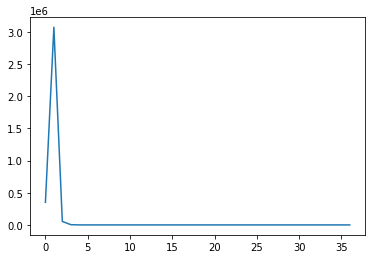

In [42]:
import matplotlib.pyplot as plt 

# Sort the dict by key for visualization
num_institutions_sorted = OrderedDict(sorted(num_institutions.items()))

plt.plot(list(num_institutions_sorted.keys()), list(num_institutions_sorted.values()))

<br><br><br>

**🟡 invalid data: There are authors that have 0 affiliations**

Let's look at the data in details.

In [43]:
counter = 0
for i in range(len(all_works_52)):
    for author in all_works_52[i]['authorships']:
        if len(author['institutions']) == 0:
            counter += 1
            print(all_works_52[i]['authorships'])
            print()
            break
    if counter == 3:
        break

[{'author_position': 'first', 'author': {'id': 'https://openalex.org/A3189215934', 'display_name': 'S. Agostinelli', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I83816512', 'display_name': 'University of Genoa', 'ror': 'https://ror.org/0107c5v14', 'country_code': 'IT', 'type': 'education'}], 'raw_affiliation_string': None}, {'author_position': 'middle', 'author': {'id': 'https://openalex.org/A3095576750', 'display_name': 'John Allison', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I28407311', 'display_name': 'University of Manchester', 'ror': 'https://ror.org/027m9bs27', 'country_code': 'GB', 'type': 'education'}], 'raw_affiliation_string': None}, {'author_position': 'middle', 'author': {'id': 'https://openalex.org/A2521683658', 'display_name': 'K. Amako', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I138728355', 'display_name': 'High Energy Accelerator Research Organization', 'ror': 'https://ror.org/01g5y5k24', 'country_code': 'JP', 

**After looking at the three examples, we found that: for those publications which have authors without institutions, their first author usually has multiple institutions (one in Canada, the other in Asia).**

We can leave the challenge here and consider those publications as collaborations as well. We will come back to the problem after the collaborations are well defined. 

<br><br><br>

### 3.2. Publication Year

In [44]:
publication_year = defaultdict(int)

for i in range(len(all_works_52)):
    publication_year[all_works_52[i]['publication_year']] += 1
print(publication_year)

defaultdict(<class 'int'>, {2003: 1607, 2006: 2553, 1993: 361, 2014: 6257, 2015: 6890, 2007: 2858, 2012: 5230, 2009: 3857, 2016: 7238, 2011: 4690, 2000: 1075, 2021: 2986, 2018: 7508, 1983: 102, 2002: 1352, 2013: 5770, 2008: 3303, 2019: 7362, 2005: 2110, 2004: 1883, 2010: 4237, 2017: 7772, 1994: 420, 1999: 868, 1995: 488, 1998: 738, 1996: 628, 1985: 135, 2001: 1156, 1997: 674, 2020: 6227, 1992: 336, 1991: 297, 1978: 45, 1984: 128, 1962: 3, 1989: 245, 1990: 260, 1986: 150, 1982: 85, 1960: 5, 1988: 195, 1969: 8, 1980: 51, 1976: 37, 1970: 7, 1961: 9, 1964: 5, 1987: 189, 1974: 30, 1972: 15, 1981: 83, 1968: 9, 1973: 33, 2022: 217, 1979: 72, 1977: 39, 1965: 8, 1975: 28, 1971: 18, 1963: 2, 1959: 1, 1967: 8, 1966: 4, 1912: 1, 1954: 1, 2023: 1})


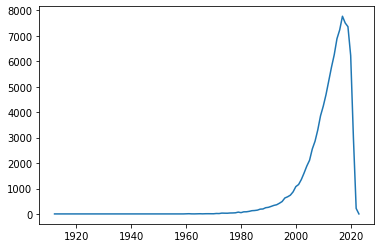

In [46]:
# Sort the dict by key for visualization
publication_year_sorted = OrderedDict(sorted(publication_year.items()))

plt.plot(list(publication_year_sorted.keys()), list(publication_year_sorted.values()))

In [62]:
publication_year_sorted[2023]

1

**🟡 invalid data: There are `publication_year` values greater than 2022** (only one in this case)

**🟢 We need to filter out those works whose `publication_year` is greater than 2022**

In [52]:
len(all_works_52)

100960

In [56]:
# We will make a new list for this because python doesn't allow us to remove values with a loop
all_works_52_2022 = []

for i in range(len(all_works_52)):
    if all_works_52[i]['publication_year'] <= 2022:
        all_works_52_2022.append(all_works_52[i])

In [57]:
print(f'Now we have {len(all_works_52_2022)} publications left.')

Now we have 100959 publications left.


<br><br><br>

### 3.3. `is_retracted`

In [65]:
is_retracted = defaultdict(int)

for i in range(len(all_works_52_2022)):
    is_retracted[all_works_52_2022[i]['is_retracted']] += 1
print(is_retracted)

defaultdict(<class 'int'>, {False: 100930, True: 29})


**🟡 invalid data: There are 29 works that have been retracted.**

**🟢 We need to filter out those works whose `is_retracted` is `True`**

In [66]:
# We will make a new list for the filtered data
all_works_52_2022_r = []

for i in range(len(all_works_52_2022)):
    if all_works_52_2022[i]['is_retracted'] == False:
        all_works_52_2022_r.append(all_works_52_2022[i])

In [67]:
print(f'Now we have {len(all_works_52_2022_r)} publications left.')

Now we have 100930 publications left.


<br><br><br>

### 3.4. Concepts of The Works

In [69]:
concepts_count = defaultdict(int)

for i in range(len(all_works_52_2022_r)):
    for j in range(len(all_works_52_2022_r[i]['concepts'])):
        concept = all_works_52_2022_r[i]['concepts'][j]['display_name']
        concepts_count[concept] += 1

In [70]:
print(f'There are {len(concepts_count)} concepts in these works.')

There are 42709 concepts in these works.


In [71]:
concepts_count_sorted = sorted(concepts_count.items(), key=lambda x:x[1])

Let's take a look at the most popular 20 concepts and the concepts that only appeared once:

**The most popular 20 concepts:**

In [72]:
concepts_count_sorted[-20:]

[('Composite material', 2960),
 ('Endocrinology', 3064),
 ('Business', 3249),
 ('Population', 3646),
 ('Nanotechnology', 3741),
 ('Artificial intelligence', 3781),
 ('Genetics', 4074),
 ('Geology', 4394),
 ('Cell biology', 4651),
 ('Chemical engineering', 4904),
 ('Psychology', 5227),
 ('Mathematics', 5362),
 ('Environmental science', 8104),
 ('Physics', 8136),
 ('Internal medicine', 10928),
 ('Materials science', 14063),
 ('Chemistry', 15360),
 ('Computer science', 16856),
 ('Biology', 17173),
 ('Medicine', 21468)]

**The concepts that only appeared once:**

In [73]:
concept_once = []
for (con, num) in concepts_count_sorted:
    if num == 1:
        concept_once.append(con)
print(f'There are {len(concept_once)} concepts that only appeared once')

There are 10890 concepts that only appeared once


Let's visualize the most popular 20 concepts:

In [74]:
# making the lists for plotting
concepts, counts = [], []
for con, num in concepts_count_sorted[-20:]:
    concepts.append(con)
    counts.append(num)

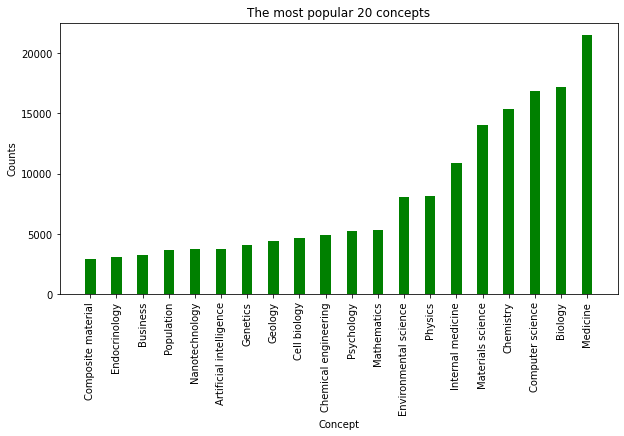

In [75]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(concepts, counts, color ='green',
        width = 0.4)
plt.xticks(ticks=range(len(concepts)), labels=concepts, rotation=90)
plt.xlabel("Concept")
plt.ylabel("Counts")
plt.title("The most popular 20 concepts")
plt.show()

<br><br><br>

### 3.5. [Predatory Journals](https://www.ohri.ca/journalology/one-stop-shop-predatory-journals)

“Predatory journals & publishers are entities that prioritize self-interest at the expense of scholarship and are characterized by false or misleading information, deviation from best editorial and publication practices, a lack of transparency, and/or the use of aggressive and indiscriminate solicitation practices.”

**🔻 Challenge 3: For the sake of data quality, we should filter out those works from Predatory Journals.**

In [84]:
host_venue_count = defaultdict(int)

for i in range(len(all_works_52_2022_r)):
    host_venue_count[all_works_52_2022_r[i]['host_venue']['display_name']] += 1

In [85]:
print(f'There are {len(host_venue_count)} venues hosting these works.')

There are 10559 venues hosting these works.


In [90]:
host_venue_count_sorted = sorted(host_venue_count.items(), key=lambda x:x[1])

**The 20 most popular venes:**

In [91]:
host_venue_count_sorted[-20:]

[('Journal of Clinical Oncology', 324),
 ('IEEE Transactions on Vehicular Technology', 326),
 ('Science of The Total Environment', 336),
 (None, 340),
 ('Science', 348),
 ('The Lancet', 351),
 ('European Physical Journal C', 369),
 ('Monthly Notices of the Royal Astronomical Society', 404),
 ('Physical Review B', 405),
 ('Physical Review D', 419),
 ('Journal of Biological Chemistry', 438),
 ('Nature', 465),
 ('Physics Letters B', 465),
 ('Proceedings of the National Academy of Sciences of the United States of America',
  466),
 ('Physical review', 519),
 ('Nature Communications', 574),
 ('Scientific Reports', 687),
 ('The Astrophysical Journal', 703),
 ('Physical Review Letters', 959),
 ('PLOS ONE', 1051)]

In [97]:
venue_once = []
for (con, num) in host_venue_count_sorted:
    if num == 1:
        venue_once.append(con)
print(f'There are {len(venue_once)} venues that only host one publication')

There are 3929 venues that only host one publication


In [96]:
while True:pass

KeyboardInterrupt: ignored

**🟡 invalid data: There are 340 works' hosting venues are `None`.**

Let's visualize the most popular 20 venues:

In [98]:
# making the lists for plotting
venues, counts = [], []
for ven, num in host_venue_count_sorted[-20:]:
    venues.append(str(ven)) # convert the None into string in order to visualize
    counts.append(num)

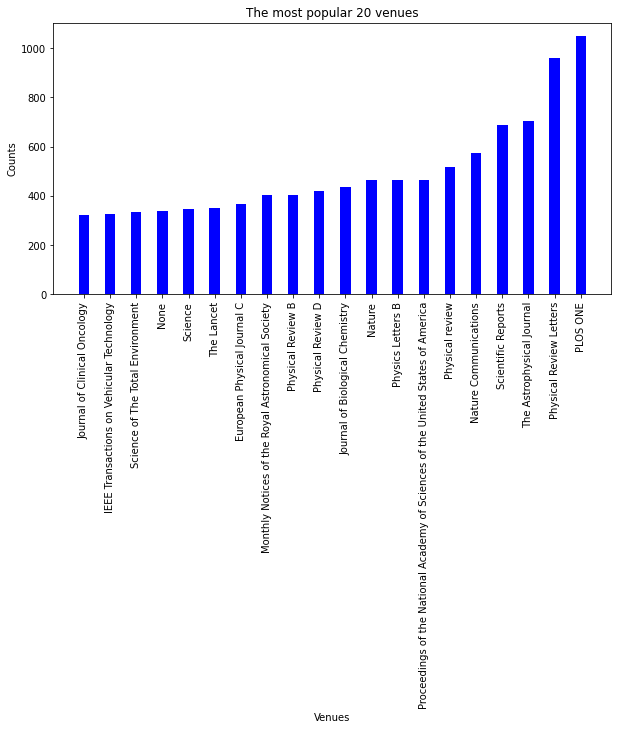

In [99]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(venues, counts, color ='blue',
        width = 0.4)
plt.xticks(ticks=range(len(venues)), labels=venues, rotation=90)
plt.xlabel("Venues")
plt.ylabel("Counts")
plt.title("The most popular 20 venues")
plt.show()

<br><br><br>

### 3.6. [Types of The Works](https://docs.openalex.org/about-the-data/work#type)

The type of a work may represent the quality and rigor of the work. 

In [100]:
type_count = defaultdict(int)

for i in range(len(all_works_52_2022_r)):
    type_count[all_works_52_2022_r[i]['type']] += 1

In [101]:
print(type_count)

defaultdict(<class 'int'>, {'journal-article': 97049, 'book': 58, 'posted-content': 376, None: 73, 'proceedings-article': 2477, 'reference-entry': 22, 'book-chapter': 809, 'monograph': 19, 'report': 21, 'other': 15, 'journal-issue': 3, 'dataset': 1, 'component': 2, 'peer-review': 1, 'report-series': 2, 'proceedings': 1, 'journal': 1})


**🟡 invalid data: There are 73 works' types are `None`.**

In [102]:
# making the lists for plotting
types = [str(type_) for type_ in type_count.keys()]
counts = type_count.values()

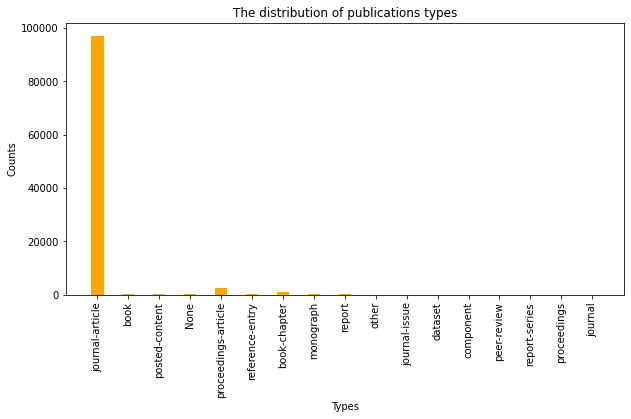

In [103]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, counts, color ='orange',
        width = 0.4)
plt.xticks(ticks=range(len(types)), labels=types, rotation=90)
plt.xlabel("Types")
plt.ylabel("Counts")
plt.title("The distribution of publications types")
plt.show()

KeyboardInterrupt: ignored

## Structured Dataframe

In [ ]:
import pandas as pd
# convert the Json file to data frame

from pandas import json_normalize

df = json_normalize(all_works_52_2022_r)

In [1]:
len(all_works_52_2022_r)

NameError: ignored

In [ ]:
while True: pass

<br><br><br>

## 4. Exploratory Questions and Visualization

### 4.1. What is the volume and growth trend of Canada and Asia research collaborations? (`Line Graph`, may group by `countries`)

### 4.2. What is the trend of topics/concepts over time?  (`Line Graph` + `Word Cloud`, may filter the top 10 topics)

### 4.3. Which venues host the most collaborations between Canada and Asia? (`Bar Graph`)

### 4.4. Which institutions in Canada have more collaboration with Asia? (`Bar Graph`, or show the trend with `Line Graph`)

### 4.5. Which institutions in Asia have more collaboration with Canada? (`Bar Graph`, or show the trend with `Line Graph`)

### 4.6. How's the co-citation network like between Canada and Asia authors? (`Co-citation graph generator`)

### 4.7. What's the percentage of Open Access publications? (`Pie Graph`)